In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit

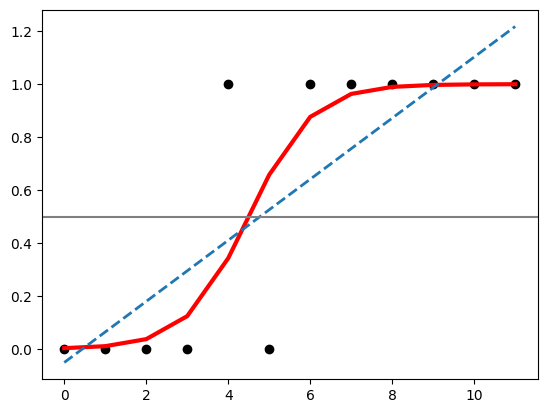

In [ ]:
X = np.arange(12).reshape(-1, 1)
y = np.array([0, 0, 0, 0,1,0, 1, 1, 1, 1, 1, 1])
plt.plot(X, y, 'ko')

# Ajusta o modelo de regressao logistica
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)
loss = expit(X * model.coef_ + model.intercept_).ravel()
plt.plot(X, loss, color='red', linewidth=3)

# Podemos obter uma curva mais suave
#xx = np.arange(min(X), max(X), 0.01)
#loss = expit(xx * model.coef_ + model.intercept_).ravel()
#plt.plot(xx, loss, color='red', linewidth=3)

# Ajusta um modelo de regressao linear
linear = linear_model.LinearRegression()
linear.fit(X, y)
plt.plot(X, linear.coef_ * X + linear.intercept_, linewidth=2, linestyle='dashed')
plt.axhline(.5, color='.5')
plt.savefig('logistic.eps')
plt.show(True)

In [ ]:
p = model.predict_proba(X)
print(p)

[[9.97194873e-01 2.80512708e-03]
 [9.89727807e-01 1.02721933e-02]
 [9.63119034e-01 3.68809657e-02]
 [8.76205038e-01 1.23794962e-01]
 [6.57340632e-01 3.42659368e-01]
 [3.42079153e-01 6.57920847e-01]
 [1.23515708e-01 8.76484292e-01]
 [3.67895382e-02 9.63210462e-01]
 [1.02460269e-02 9.89753973e-01]
 [2.79792780e-03 9.97202072e-01]
 [7.59885722e-04 9.99240114e-01]
 [2.06069640e-04 9.99793930e-01]]


In [ ]:
print("Acurácia:", model.score(X, y))

Acurácia: 0.8333333333333334


O modelo de regressão logística usa a função logística

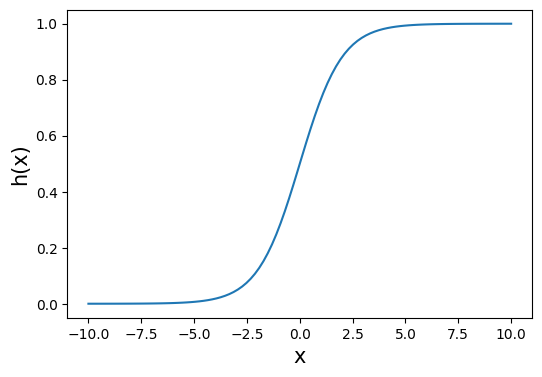

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.figure(figsize=(6,4))
plt.plot(x, z)
plt.xlabel("x", fontsize = 15)
plt.ylabel("h(x)", fontsize = 15)
plt.savefig('logistic-function.eps')
plt.show()

# Região de Separação

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

In [ ]:
# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(0, 0), (-2, -2)]

In [ ]:
# Separação Treino e Teste
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers,
                         shuffle=False, random_state=42)

In [ ]:
# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))

In [ ]:
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

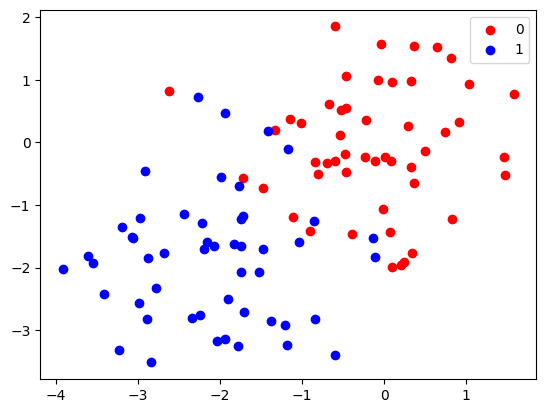

In [ ]:
# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('plot_ex.eps')
plt.legend()
plt.show()

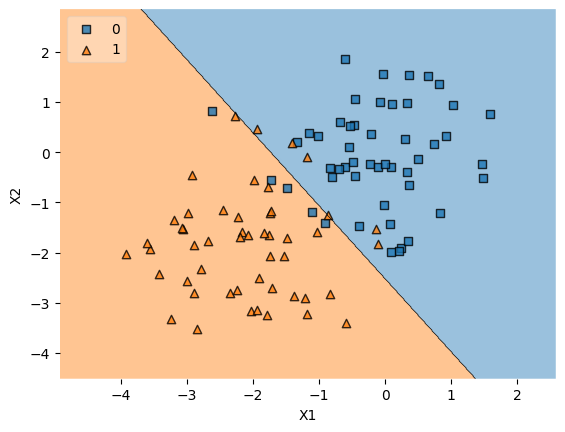

In [ ]:
# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()

Para 3 Classes

In [ ]:
# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(0, 0), (-2, -2), (2,0)]

In [ ]:
# Treinamento e Teste
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers,
                         shuffle=False, random_state=42)

In [ ]:
# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))

In [ ]:
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)


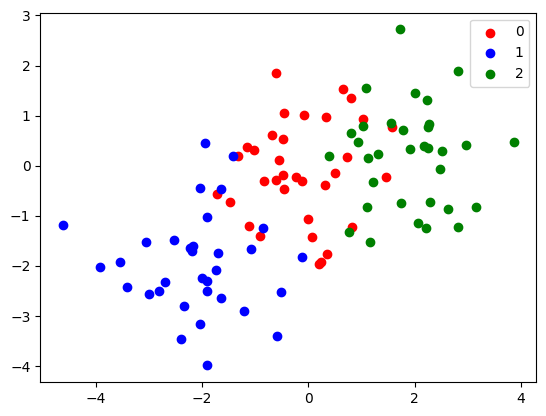

In [ ]:
# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('plot_ex.eps')
plt.legend()
plt.show()

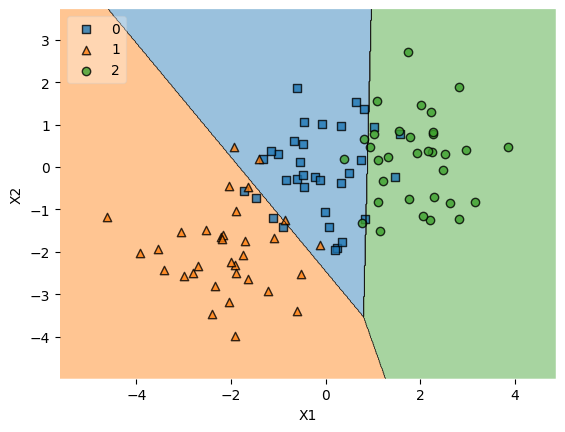

In [ ]:
# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()

# Exemplo Classificação de Dados

In [ ]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/vertebralcolumn-3C.csv', header=(0))


In [ ]:
data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)


In [ ]:
print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

Número de linhas e colunas na matriz de atributos: (310, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [ ]:
data['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [ ]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Selecionamos os conjunto de treinamento e teste usando o método hold-out.

In [ ]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Realizando a classificação por regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [ ]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.8548387096774194
